In [1]:
import requests
import pandas as pd
import json
from io import StringIO
from typing import Optional
import re
# URL de la API que proporciona el dataset en formato JSON
url = 'https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json'

# Realizar la solicitud GET a la API
response = requests.get(url)

C:\Users\OWNER\AppData\Local\Temp\ipykernel_23572\1265179120.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Verificar que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Acceder al contenido de la respuesta, que es un JSON
    data = response.json()
    
    # Convertir el objeto JSON en una cadena JSON
    json_str = json.dumps(data)
    
    # Usar StringIO para convertir la cadena JSON en un objeto similar a un archivo
    json_data = StringIO(json_str)
    
    # Leer el objeto similar a un archivo con pd.read_json() y almacenarlo en 'df'
    df = pd.read_json(json_data)

    print('DataFrame creado con éxito:')
    display(df.head())  # Muestra las primeras filas del DataFrame para verificar
    df.info()
else:
    print(f'Error al hacer la solicitud: Código de estado {response.status_code}')

DataFrame creado con éxito:


,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,41333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,41333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,39800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,41333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...


<class 'pandas.core.frame.DataFrame'>
Index: 51646 entries, 0 to 51645
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           51646 non-null  int64  
 1   name          51645 non-null  object 
 2   type          51646 non-null  object 
 3   price         51646 non-null  float64
 4   upc           51646 non-null  int64  
 5   category      51646 non-null  object 
 6   shipping      51646 non-null  object 
 7   description   51646 non-null  object 
 8   manufacturer  51584 non-null  object 
 9   model         48783 non-null  object 
 10  url           51646 non-null  object 
 11  image         51646 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


In [3]:
for index, row in df.iterrows():
    category = row['name']
    if index == 50039:
        print(category)

Jensen - Nickel-Metal Hydride Battery for Select AT&T and VTech Cordless Phones - Black


In [4]:
def extract(categories):
    return ', '.join(category['name'] for category in categories)

In [5]:

data_df = df.copy()
data_df['category'] = data_df['category'].apply(extract)
category_counts = data_df['category'].value_counts()
total_count = category_counts.sum()

for cat, count in category_counts.items():
    print(f"{cat}: {count}")

print(total_count)


Video Games, Pre-Owned Games: 3556
Cell Phones, Cell Phone Accessories, Cell Phone Cases & Clips: 1845
Cell Phones, Cell Phone Accessories, iPhone Accessories, iPhone Cases & Clips: 1471
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits: 739
Appliances, Refrigerators, All Refrigerators: 689
Audio, Bluetooth & Wireless Speakers: 637
Musical Instruments, Sheet Music & DVDs, Sheet Music: 621
Computers & Tablets, iPad & Tablet Accessories, Cases, Covers & Keyboard Folios: 508
Appliances, Small Kitchen Appliances, Cookware, Bakeware & Cutlery, Cookware: 486
Connected Home & Housewares, Office & School Supplies, Printer Ink & Toner, Printer Ink: 476
Computers & Tablets, Computer Accessories & Peripherals, Laptop Accessories, Laptop Bags & Cases: 432
TV & Home Theater, TV Stands, Mounts & Furniture, TV Stands, All TV Stands: 409
Audio, Headphones, Earbud & In-Ear Headphones: 400
Best Buy Gift Cards: 388
C

C:\Users\OWNER\AppData\Local\Temp\ipykernel_23572\3318764164.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


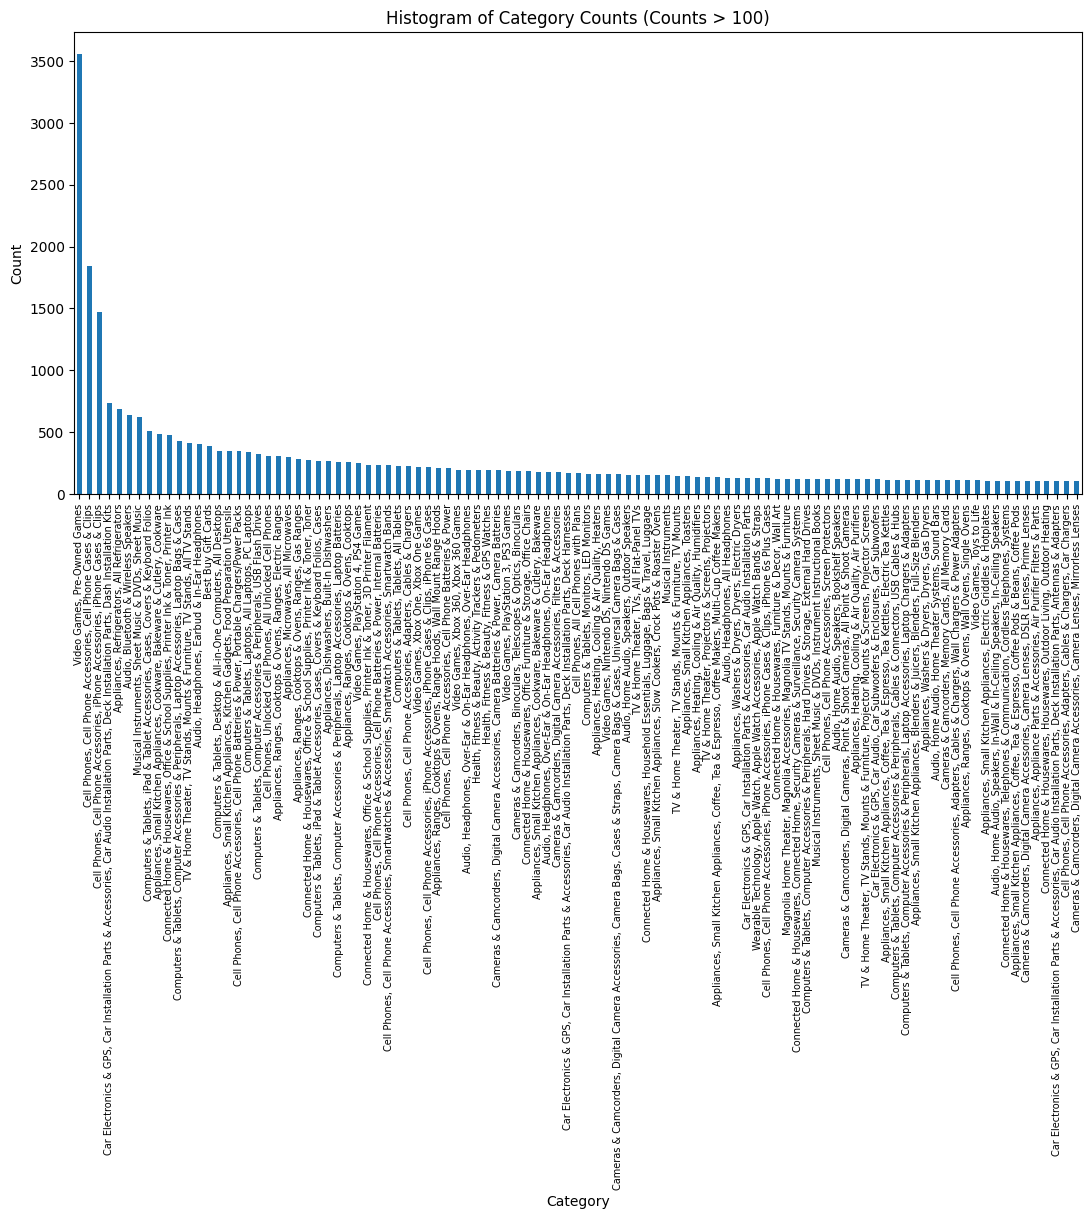

In [6]:
import matplotlib.pyplot as plt
category_counts_above_100 = category_counts[category_counts > 100]

plt.figure(figsize=(13, 6))  
category_counts_above_100.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Category Counts (Counts > 100)')
plt.xticks(rotation=90, fontsize=7)  
plt.tight_layout()  
plt.show()

In [7]:
print(total_count)
for category, count in category_counts_above_100.items():
    print(f"{category}: {count}")

category_count_above_100 = len(category_counts_above_100)
print(category_counts_above_100)
print(category_counts_above_100.sum())

51646
Video Games, Pre-Owned Games: 3556
Cell Phones, Cell Phone Accessories, Cell Phone Cases & Clips: 1845
Cell Phones, Cell Phone Accessories, iPhone Accessories, iPhone Cases & Clips: 1471
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits: 739
Appliances, Refrigerators, All Refrigerators: 689
Audio, Bluetooth & Wireless Speakers: 637
Musical Instruments, Sheet Music & DVDs, Sheet Music: 621
Computers & Tablets, iPad & Tablet Accessories, Cases, Covers & Keyboard Folios: 508
Appliances, Small Kitchen Appliances, Cookware, Bakeware & Cutlery, Cookware: 486
Connected Home & Housewares, Office & School Supplies, Printer Ink & Toner, Printer Ink: 476
Computers & Tablets, Computer Accessories & Peripherals, Laptop Accessories, Laptop Bags & Cases: 432
TV & Home Theater, TV Stands, Mounts & Furniture, TV Stands, All TV Stands: 409
Audio, Headphones, Earbud & In-Ear Headphones: 400
Best Buy Gift Cards:

In [8]:
#Statistical analysis per category
from collections import defaultdict

def categories_division(category):
    categories = category.split(', ')
    if len(categories) > 1:
        subcategory_1 = categories[1]
    else:
        subcategory_1 = None
    if len(categories) > 2:
        subcategory_2 = categories[2]
    else:
        subcategory_2 = None
    if len(categories) > 3:
        subcategory_3 = categories[3]
    else:
        subcategory_3 = None

    
        
    return subcategory_1, subcategory_2, subcategory_3

grouped_categories = defaultdict(int)

for category, count in category_counts.items():
    subcategory_1, subcategory_2, subcategory_3 = categories_division(category)

    grouped_categories[(subcategory_1, subcategory_2, subcategory_3)] += count

print("Subcategory 1, Subcategory 2, Subcategory 3: Count")
for categories, count in grouped_categories.items():
    print(f"{categories[0]}, {categories[1]}, {categories[2]}: {count}")


Subcategory 1, Subcategory 2, Subcategory 3: Count
Pre-Owned Games, None, None: 3556
Cell Phone Accessories, Cell Phone Cases & Clips, None: 1845
Cell Phone Accessories, iPhone Accessories, iPhone Cases & Clips: 1892
Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts: 1092
Refrigerators, All Refrigerators, None: 689
Bluetooth & Wireless Speakers, None, None: 637
Sheet Music & DVDs, Sheet Music, None: 621
iPad & Tablet Accessories, Cases, Covers & Keyboard Folios: 821
Small Kitchen Appliances, Cookware, Bakeware & Cutlery: 724
Office & School Supplies, Printer Ink & Toner, Printer Ink: 497
Computer Accessories & Peripherals, Laptop Accessories, Laptop Bags & Cases: 432
TV Stands, Mounts & Furniture, TV Stands: 476
Headphones, Earbud & In-Ear Headphones, None: 400
None, None, None: 747
Desktop & All-in-One Computers, All Desktops, None: 350
Small Kitchen Appliances, Kitchen Gadgets, Food Preparation Utensils: 346
Cell Phone Accessories, Cell Phone

In [9]:
import matplotlib.pyplot as plt

filtered_categories = {categories: count for categories, count in grouped_categories.items() if count > 100}
print(len(filtered_categories))

categories = []
for cat in filtered_categories.keys():
    cat_str = ', '.join([subcat for subcat in cat if subcat is not None])
    categories.append(cat_str)
counts = list(filtered_categories.values())



106


In [10]:
print(data_df['category'])

0        Connected Home & Housewares, Housewares, House...
1        Connected Home & Housewares, Housewares, House...
2        Connected Home & Housewares, Housewares, House...
3        Connected Home & Housewares, Housewares, House...
4        Connected Home & Housewares, Housewares, House...
                               ...                        
51641    Appliances, Appliance Parts & Accessories, Air...
51642    Appliances, Appliance Parts & Accessories, Vac...
51643    Computers & Tablets, Computer Accessories & Pe...
51644    TV & Home Theater, Streaming Media Players, Re...
51645       Appliances, Small Kitchen Appliances, Toasters
Name: category, Length: 51646, dtype: object


In [11]:

category_unique = data_df['category'].unique()
for category in category_unique:
    print(category)

Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries
Carfi Instore Only
Connected Home & Housewares, Housewares, Household Batteries, Specialty Batteries
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Deck Harnesses
Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Antennas & Adapters
In-Store Only
Connected Home & Housewares, Telephones & Communication, Telephone Accessories, Cordless Phone Batteries
Car Electronics & GPS, Car Audio, Car Subwoofers & Enclosures, Car Subwoofers
Musical Instruments, Recording Equipment, Sound Recording Software
Toys, Games & Drones, TV, Movie & Character Toys, Music Memorabilia
Musical Instruments, Musical Instrument Accessories, Keyboard Accessories
Toys, 

In [12]:
empty_values_df = data_df.applymap(lambda x: x == '')
nan_values_df = data_df.isna() | data_df.isnull()
null_category_rows = data_df[data_df['category'].isna() | data_df['category'].isnull()]
zero_category_rows = data_df[data_df['category'] == 0]
print(null_category_rows)
print(zero_category_rows)


Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []
Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []


C:\Users\OWNER\AppData\Local\Temp\ipykernel_23572\683562563.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_values_df = data_df.applymap(lambda x: x == '')


In [13]:
exploded_df = data_df.explode('category')
unique_categories_count = exploded_df['category'].nunique()
print("Unique categories", unique_categories_count)

Unique categories 1667


In [14]:
for index, row in exploded_df.iterrows():
    category = row['category']
    if index == 0:
        print(category)

Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries


In [15]:
type_counts = data_df['type'].value_counts()
for type, count in type_counts.items():
    print(f"{type}: {count}")

HardGood: 46103
Game: 5037
Software: 444
BlackTie: 49
Movie: 11
Music: 2


In [16]:
manuf_counts = data_df['model'].value_counts()
for manuf, count in manuf_counts.items():
    print(f"{manuf}: {count}")

manuf_counts_lenght = len(manuf_counts)
print(manuf_counts_lenght)
total_count = manuf_counts.sum()
print("Sum of all values in the 'model' column:", total_count)

PREOWNED: 517
Pre-Owned G: 117
PRE OWNED: 76
12345: 66
BND200: 35
TBD: 30
PRE-OWNED: 28
BND300: 24
E3: 18
PREOWN: 13
TEST: 11
9006426: 10
4672568: 9
6664135: 9
6102104: 9
4734027: 9
4728019: 9
4727001: 9
4726153: 9
3297027: 9
3297009: 9
2272036: 9
4450700: 9
1801428: 9
2264149: 9
2262114: 9
1801377: 9
3295001: 9
9006499: 9
1011029: 9
4623901: 9
2865647: 9
1011038: 9
1011001: 9
4450400: 9
2259002: 9
2260566: 9
9036002: 9
3293003: 9
2263122: 9
2266234: 9
7402096: 9
1800017: 9
6814834: 9
4450600: 9
1801386: 9
2271019: 9
4450500: 9
2865529: 9
1011047: 9
4450100: 9
PRE-OWNED G: 8
9006462: 8
4624100: 8
4624000: 8
8460p: 6
DUMMY VPN BATTLEFIELD: 5
UPDATE: 5
47789: 5
IPH-1350-BLK: 4
304L: 4
SHUTTERFLY: 4
305L: 4
1234: 4
V800: 4
38: 4
PRE SKU: 4
DUMMY: 4
F6JSTBC01: 4
8.34656E+11: 4
KIW-L24: 3
HDMICHOCOLA: 3
8.35E+11: 3
7730E: 3
DUMMY SKU: 3
XBOX MICROSOFT GIFT CARD 2015: 3
7100E: 3
ICB284: 3
7100: 3
7730: 3
GOOGLE: 3
BT-200: 3
PARENT: 3
320: 3
SM-G900A: 3
Df: 3
LOCUS: 3
E5803: 3
SMG925VZDA: 2
G

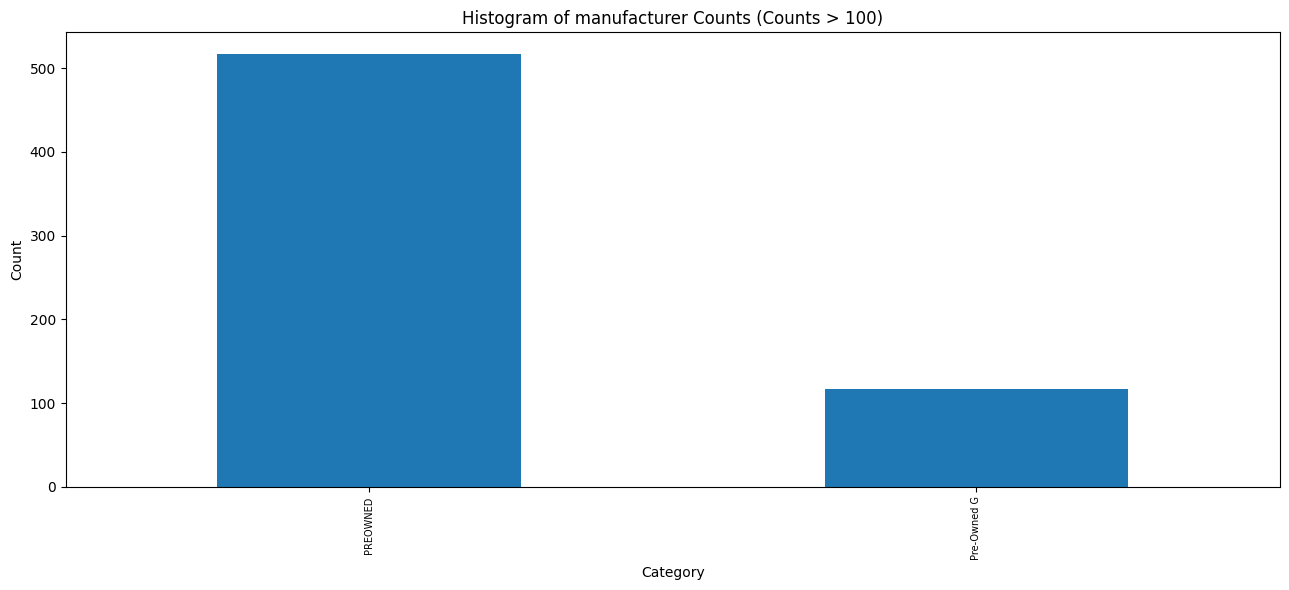

In [17]:
import matplotlib.pyplot as plt
manuf_counts_above_100 = manuf_counts[manuf_counts > 100]

plt.figure(figsize=(13, 6))  
manuf_counts_above_100.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of manufacturer Counts (Counts > 100)')
plt.xticks(rotation=90, fontsize=7)  
plt.tight_layout()  
plt.show()

In [18]:
import matplotlib.pyplot as plt

columns = data_df.columns

for i, column in enumerate(columns):

    null_column_rows = data_df[data_df[column].isna() | data_df[column].isnull()]
    zero_column_rows = data_df[data_df[column] == 0]
    
print('Null values in columns data:',null_column_rows)
print('Zero values in columns data:',zero_column_rows)

Null values in columns data: Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []
Zero values in columns data: Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []


In [19]:
duplicate_rows = data_df[data_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image]
Index: []


In [20]:
duplicate_groups = data_df.groupby(['sku', 'name', 'type', 'price', 'upc', 'category', 'shipping', 'description', 'manufacturer', 'model', 'url', 'image']).size().reset_index(name='count')
duplicate_above_2 = duplicate_groups[duplicate_groups['count'] > 1]
print(duplicate_above_2)


Empty DataFrame
Columns: [sku, name, type, price, upc, category, shipping, description, manufacturer, model, url, image, count]
Index: []


In [21]:
print(data_df)

           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
51641  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
51642  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
51643  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
51644  9999119                             Amazon - Fire TV Stick  HardGood   
51645  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc                         

In [22]:
data_df.shape

(51646, 12)

In [23]:
#forma final 

In [24]:
split_counts = data_df['category'].str.count(',') + 1
filtered_df = data_df[split_counts <= 5].copy()
filtered_df.reset_index(drop=True, inplace=True)
max_splits = data_df['category'].str.count(',').max()


In [25]:
print(filtered_df.shape)
print(max_splits)
print(filtered_df)

(50041, 12)
7
           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
50036  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
50037  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
50038  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
50039  9999119                             Amazon - Fire TV Stick  HardGood   
50040  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc           

In [26]:
splitting = filtered_df['category'].str.split(',', expand=True)
column_names = ['parent_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']
split_categories = splitting.iloc[:, :5]
split_categories = split_categories.fillna(pd.NA)
filtered_df[column_names] = split_categories
#utilizar NaN de pandas

In [27]:
print(filtered_df)

           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
50036  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
50037  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
50038  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
50039  9999119                             Amazon - Fire TV Stick  HardGood   
50040  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc                         

In [28]:
filtered_df.drop(columns=['category',], inplace=True)
filtered_df.shape

(50041, 16)

In [29]:
filtered_url = filtered_df.copy()
filtered_url['url'] = filtered_df['url'].str.split('/').str[4:5].str.join('/')
print(filtered_url['url'])


0                            duracell-aaa-batteries-4-pack
1              duracell-aa-1-5v-coppertop-batteries-4-pack
2                             duracell-aa-batteries-8-pack
3                        energizer-max-batteries-aa-4-pack
4                              duracell-c-batteries-4-pack
                               ...                        
50036    honeywell-true-hepa-replacement-filters-for-se...
50037    dyson-hard-floor-wipes-for-dyson-hard-dc56-vac...
50038              aleratec-drive-enclosure-internal-black
50039                                 amazon-fire-tv-stick
50040             proctor-silex-4-slice-toaster-oven-white
Name: url, Length: 50041, dtype: object


In [30]:
print(filtered_url.shape)
print(filtered_url)

(50041, 16)
           sku                                               name      type  \
0        43900                  Duracell - AAA Batteries (4-Pack)  HardGood   
1        48530    Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   
2       127687                   Duracell - AA Batteries (8-Pack)  HardGood   
3       150115              Energizer - MAX Batteries AA (4-Pack)  HardGood   
4       185230                    Duracell - C Batteries (4-Pack)  HardGood   
...        ...                                                ...       ...   
50036  9995663  Honeywell - True HEPA Replacement Filters for ...  HardGood   
50037  9996238  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   
50038  9996826      Aleratec - Drive Enclosure - Internal - Black  HardGood   
50039  9999119                             Amazon - Fire TV Stick  HardGood   
50040  9999678       Proctor Silex - 4-Slice Toaster Oven - White  HardGood   

       price           upc shipping  \


In [31]:
filtered_url.drop(columns=['image','sku', 'upc', 'shipping', 'model'], inplace=True)
init_dataset = filtered_url
init_dataset['url'] = init_dataset['url'].str.replace('-', ' ')

In [32]:
print(init_dataset)

                                                    name      type  price  \
0                      Duracell - AAA Batteries (4-Pack)  HardGood   5.49   
1        Duracell - AA 1.5V CopperTop Batteries (4-Pack)  HardGood   5.49   
2                       Duracell - AA Batteries (8-Pack)  HardGood   7.49   
3                  Energizer - MAX Batteries AA (4-Pack)  HardGood   4.99   
4                        Duracell - C Batteries (4-Pack)  HardGood   8.99   
...                                                  ...       ...    ...   
50036  Honeywell - True HEPA Replacement Filters for ...  HardGood  49.99   
50037  Dyson - Hard Floor Wipes for Dyson Hard DC56 V...  HardGood   6.99   
50038      Aleratec - Drive Enclosure - Internal - Black  HardGood  35.99   
50039                             Amazon - Fire TV Stick  HardGood  39.99   
50040       Proctor Silex - 4-Slice Toaster Oven - White  HardGood  25.99   

                                             description   manufacturer  \


In [33]:
init_dataset[['parent_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']].nunique()

parent_category     62
sub_category_1     148
sub_category_2     558
sub_category_3     719
sub_category_4     299
dtype: int64

In [34]:
init_dataset_1 = init_dataset.copy()

In [40]:
init_dataset_1.drop(columns=['sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4'], inplace=True)
print(init_dataset_1)


KeyError: "['sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4'] not found in axis"

In [41]:
init_dataset_1.to_csv('init_dataset_1.csv', index=False)

In [37]:
def remove_special_chars(text: str, remove_digits: Optional[bool] = False) -> str:

    # TODO
    if remove_digits:
        pattern = r'[^a-zA-Z\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s]'

    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [38]:
testing_dataset = init_dataset_1.copy()

selected_columns = ['name', 'description', 'manufacturer', 'url']
testing_dataset[selected_columns] = testing_dataset[selected_columns].astype(str)
testing_dataset[selected_columns] = testing_dataset[selected_columns].apply(lambda x: x.map(remove_special_chars))

In [39]:
def remove_extra_whitespace(text: str) -> str:
    """
    Remove any whitespace from input string.

    Args:
        text : str
            Input string.

    Return:
        str
            Output string.
    """
    # TODO
    spaceless_text = re.sub(r'\s+', ' ', text)
    return spaceless_text